# Regression Modeling in Business Analytics

## Historical Background
Regression, although a cornerstone of modern analytics, has its roots in the work of Sir Francis Galton and Karl Pearson, who in the early 20th century, studied inherited characteristics of sweet peas. Over the years, regression has grown into a fundamental statistical technique to understand relationships between variables.

## What is Regression in Business Analytics?

In business analytics, regression serves as a vital tool for understanding and quantifying the relationships between variables that impact critical business outcomes. Here's a breakdown of its key components and uses in this context:

- **Modeling Relationships:** Regression allows businesses to model and describe relationships between different factors or variables that affect a specific outcome. For instance, a company might want to understand how changes in advertising expenditure, pricing strategies, and market competition impact its sales revenue.

- **Prediction and Forecasting:** One of the primary applications of regression in business analytics is prediction. Businesses can use regression models to forecast future values of the output variable based on historical data and current input variables. For example, a retail business might employ regression to predict future sales based on past sales data, marketing expenses, and economic indicators.

- **Performance Analysis:** Regression helps assess the effectiveness of various business strategies or interventions. It can determine how changes in different factors influence performance metrics. For instance, a manufacturing company might use regression to assess how changes in production processes impact product quality.

In summary, regression analysis in business analytics empowers organizations to leverage data for making informed decisions, optimizing processes, and achieving their strategic objectives. It helps businesses navigate the complexities of the marketplace by quantifying relationships and providing actionable insights based on empirical evidence.


## Key Terms
- **Explanatory (Input) Variable(s):** Often represented by 𝑥, these are the variables that explain or predict the response variable.
- **Response (Output) Variable:** Often represented by 𝑦, this is the variable we're trying to predict or explain.

# Simple vs. Multivariate Regression

## Simple Linear Regression
**Definition:** In simple linear regression, we model the relationship between a single explanatory variable and the response variable. It is termed "linear" because the relation is represented with a straight line.

**Equation:**  
$y = \beta_0 + \beta_1 x + \epsilon$

**Where:**
- $\beta_0$: y-intercept
- $\beta_1$: Slope of the line
- $\epsilon$: Error term

**Example in Business Analytics:**  
Suppose a retail business wants to determine how the amount of money spent on online advertising (explanatory variable) affects online sales (response variable). Using simple linear regression, they could model this relationship and make future predictions on sales based on their advertising expenditure.

## Multivariate (Multiple) Linear Regression
**Definition:** In multivariate regression, we model the relationship between two or more explanatory variables and the response variable. It extends the concept of simple regression to include multiple predictors, allowing for more complex analyses and predictions.

**Equation:**  
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon$

**Where:**
- Each $\beta$ is a coefficient indicating the weight or importance of its respective explanatory variable.
- $x_1, x_2, \ldots, x_n$ are the different explanatory variables.
- $\epsilon$: Error term

**Example in Business Analytics:**  
Consider a real estate company trying to predict the selling price of houses (response variable). They might use multiple explanatory variables such as the number of bedrooms, house size in square feet, location, and age of the house. Using multivariate regression, the company can model the relationship between all these factors and the selling price, giving them a holistic view and better prediction accuracy.


# Pearson Correlation Coefficient: An Introduction

## What is Pearson Correlation Coefficient?

The Pearson correlation coefficient, often represented by **r**, is a statistic that measures the linear relationship between two variables. Its value ranges from -1 to 1:

- **1:** Perfect positive linear relationship.
- **-1:** Perfect negative linear relationship.
- **0:** No linear relationship.

## Types of Pearson Correlation

1. **Strong Positive Correlation:** When one variable increases, the other variable tends to also increase. **r** is close to 1.

2. **Weak Positive Correlation:** A vague upward trend but not a consistent linear relationship. **r** is greater than 0 but less than, say, 0.5.

3. **No Correlation:** No observable pattern in the scatter plot. **r** is close to 0.

4. **Weak Negative Correlation:** A vague downward trend. **r** is less than 0 but greater than -0.5.

5. **Strong Negative Correlation:** When one variable increases, the other tends to decrease. **r** is close to -1.


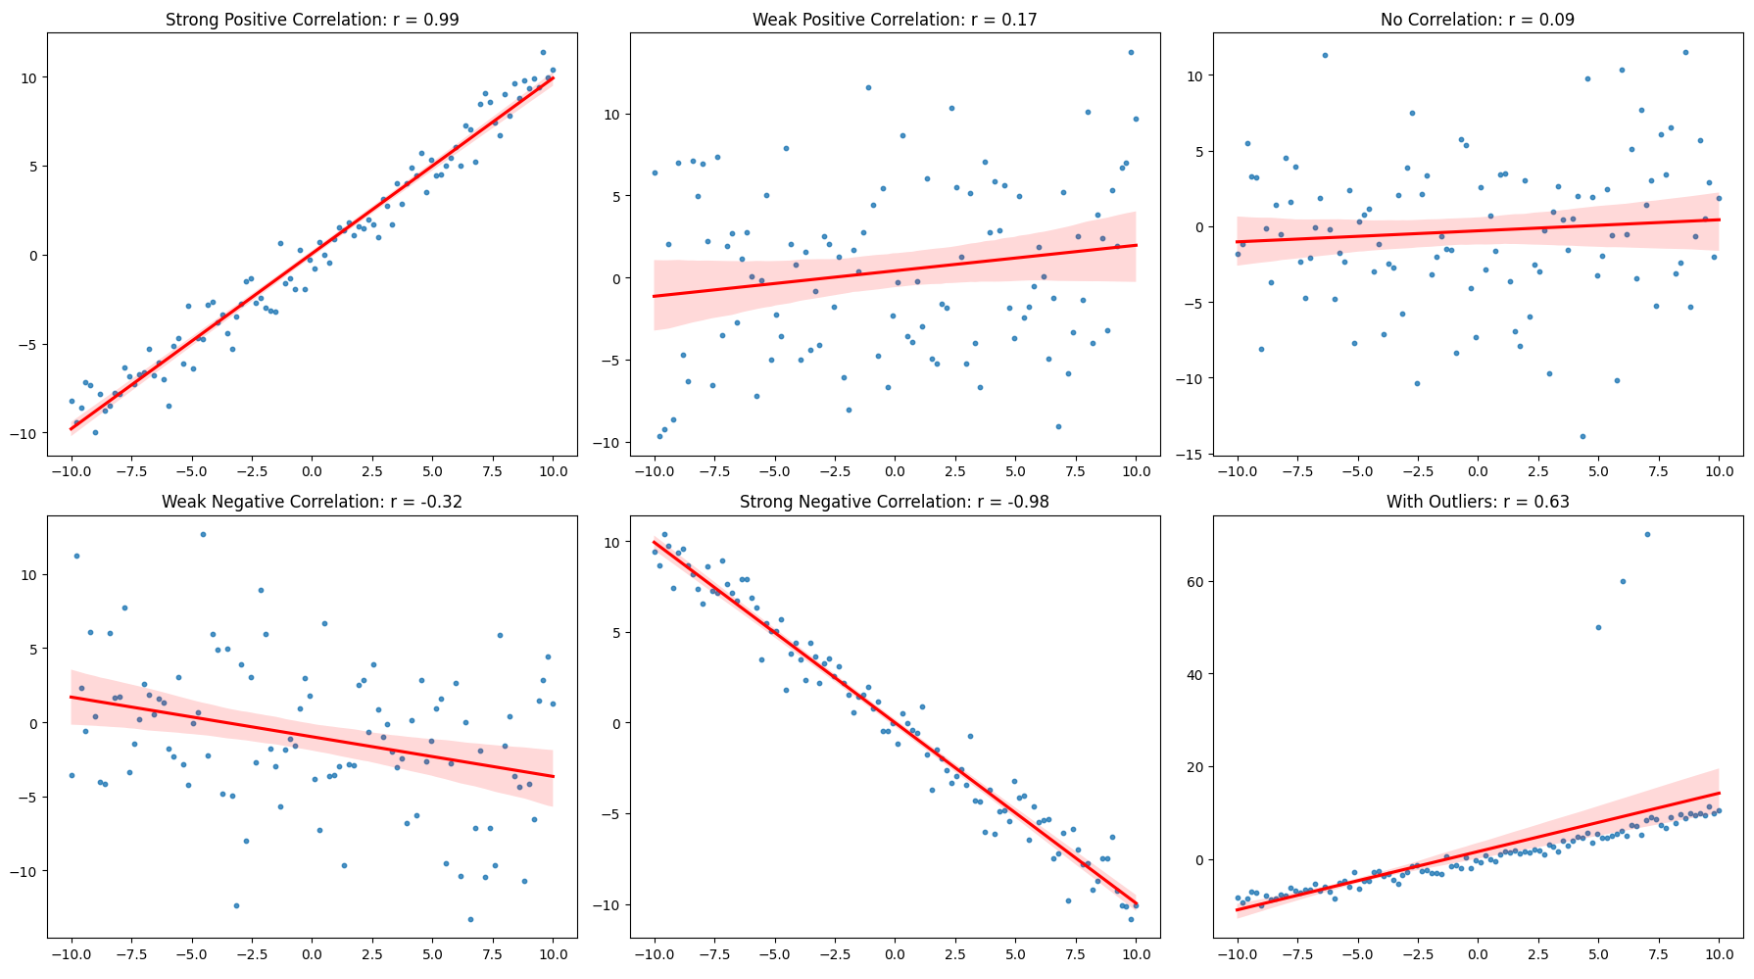

Linear regression gives us the **best-fit line** for all the datapoints.

Takes into consideration of all data points and minimizes the space between every point and the line.

## Implementing Simple Linear Regression using statsmodels

## Step 1: Preparing the Data

Before training our model, we'll follow these steps to prepare our data:

1. **Separate Predictors and Target Variable:**
   - We will separate our dataset into predictors (X) and the target variable (y).

2. **Adding a Constant to Predictors:**
   - We'll add a constant term to our predictor variable. This constant allows statsmodels to fit an intercept term in the linear regression model.

Let's start by importing the necessary libraries and loading our dataset.

In [2]:
# Import modules
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/home_prices_dataset.csv')
df.head()

# Home Price is what we are trying to predict

,Square Feet,Number of Bedrooms,Number of Bathrooms,Home Price,Neighborhood
0,2695,5,1.9,416065.69,Desirable
1,3115,2,1.8,363222.51,Average
2,3238,3,1.8,445516.48,Average
3,2980,2,2.8,362623.83,Average
4,2564,2,1.9,322251.10,Average


In [4]:
# Calculate the correlation matrix for all numerical variables
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)

# If the variable of interest is Home Price, the strongerst correlation is Square Feet at 0.920672

                     Square Feet  Number of Bedrooms  Number of Bathrooms  \
Square Feet             1.000000            0.078085             0.035988   
Number of Bedrooms      0.078085            1.000000            -0.003946   
Number of Bathrooms     0.035988           -0.003946             1.000000   
Home Price              0.920672            0.304983             0.123104   

                     Home Price  
Square Feet            0.920672  
Number of Bedrooms     0.304983  
Number of Bathrooms    0.123104  
Home Price             1.000000  


In [6]:
# Define the independent variable (X) and dependent variable (y)
X = df['Square Feet']
y  = df['Home Price']

## Step 2: Training the Model

Now that we've prepared our data, we will create and fit the regression model using the `sm.OLS` (Ordinary Least Squares) method from the `statsmodels` library.


In [7]:
import statsmodels.api as sm
# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Create a linear regression model
# OLS = Ordinary Least Squares
model = sm.OLS(y, X).fit()

## Step 3: Viewing the Summary

After training our regression model, it's essential to examine the summary provided by statsmodels. This summary contains various statistical measures that are crucial for assessing the model's performance and understanding the significance of its parameters.

In [9]:
df.head()

,Square Feet,Number of Bedrooms,Number of Bathrooms,Home Price,Neighborhood
0,2695,5,1.9,416065.69,Desirable
1,3115,2,1.8,363222.51,Average
2,3238,3,1.8,445516.48,Average
3,2980,2,2.8,362623.83,Average
4,2564,2,1.9,322251.10,Average


In [8]:
# Print the regression summary
print(model.summary())
# R-squared tells us that square feet is able to explain 84.8% of Home Price variation
# const is Beta 0

                            OLS Regression Results                            
Dep. Variable:             Home Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2770.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          1.34e-205
Time:                        01:20:21   Log-Likelihood:                -5974.6
No. Observations:                 500   AIC:                         1.195e+04
Df Residuals:                     498   BIC:                         1.196e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.655e+04   5474.010     15.811      

In [10]:
# Get the coefficients
intercept = model.params['const']
coef_sqf = model.params['Square Feet']

In [13]:
# Build the linear regression equation as a string
equation = f"Home Price = {intercept} + {coef_sqf} * Square Feet"


In [12]:
# Explain the coefficients
print(equation)
# Plug in square feet into this equation to find the home price
# coef_sqf tells us that price per square feet is $104.91

# A model is a solution for a mathematical problem

Home Price = 86547.1253334601 + 104.918474759799 * Square Feet


### Interpretation of Coefficients in a Simple Linear Regression

- **Intercept (β0):** 98675.63 - This represents the estimated home price when Square Feet is 0, which may not be meaningful in this context.

- **Coefficient (β1):** 100.77 - This represents the estimated change in home price for each additional square foot.




**Positive Relationship:** Since the coefficient (**β1**) is positive (approximately **100.77**), it indicates that there is a positive linear relationship between the square footage of a home and its price in your dataset. In other words, as the square footage of a home increases, the estimated home price also increases.

**Magnitude of Change:** The coefficient's magnitude (**100.77**) tells you the amount by which the estimated home price is expected to change for each additional square foot. In this case, for every one-unit increase in square footage, the estimated home price is expected to increase by approximately **$100.77**.

**Interpretation Example:** Let's say you have two homes with square footages that differ by **100** square feet. According to your model, for every additional **100** square feet of living space, the estimated home price is expected to increase by approximately **$10,077**. This is the effect of square footage on home prices as estimated by your model.

**Model's Limitations:** It's essential to note that this interpretation is specific to the dataset and model you've used. The coefficient's value is based on the relationships observed in your data. Other factors not included in the model, such as location, neighborhood, amenities, and market conditions, can also influence home prices but are not accounted for in this simple linear regression model.

**Statistical Significance:** To assess the practical significance of this coefficient, you should also consider its statistical significance, often indicated by the p-value associated with the coefficient. A low p-value (typically below **0.05**) suggests that the coefficient is statistically significant and reliable.

In summary, the coefficient (**β1**) of approximately **100.77** represents the estimated increase in home price for each additional square foot of living space in your dataset. It captures the linear relationship between square footage and home prices within the specific context of your model.


## Key Assumptions in Linear Regression

Linear regression is a powerful statistical tool used for understanding and predicting relationships between variables. However, to use it effectively, we need to make certain important assumptions about our data and the relationships we are modeling. Let's explore these key assumptions:

**1. Linearity:** This assumption states that the relationship between the outcome variable (the one we want to predict) and the predictor variables (the ones we use to make predictions) is linear. In simpler terms, it means that changes in the outcome variable are expected to follow a straight line as the predictor variables change. It also assumes that the impact of each predictor variable on the outcome is consistent and doesn't depend on the values of other predictors.

**2. Independence of Errors:** Linear regression assumes that the errors, which are the differences between our predicted values and the actual values (residuals), should not be related to each other. In other words, the errors should be random and not show any systematic patterns or trends. This is crucial because related errors can affect the reliability of our model's predictions.

**3. Normal Distribution of Errors:** Another assumption is that the errors should follow a normal distribution. In practical terms, this means that they are evenly spread out and symmetrically distributed around zero. This assumption allows us to make statistical inferences about our model's parameters. However, for large datasets, this assumption becomes less critical due to the Central Limit Theorem.

**4. Constant Variance of Errors (Homoscedasticity):** This assumption implies that the spread or variance of errors should be roughly the same across all levels of the predictor variables. In other words, the variability of errors should not change as we move along the predictor values. Violating this assumption can lead to inaccurate confidence intervals and predictions.

**5. Multicollinearity:** This assumption pertains to the predictor variables themselves. It suggests that the predictor variables should not be highly correlated with each other. If two or more predictor variables provide almost the same information or are strongly related, it can cause problems in the model. This can be likened to having the same information repeated, which can lead to unstable or unreliable results.

In summary, these assumptions are fundamental to ensure the reliability and validity of linear regression models. Violating these assumptions can affect the accuracy of predictions and the interpretation of model results. It's essential to assess and address these assumptions when using linear regression for data analysis.


## Expectations for Linear Regression Assumption Checks

When performing linear regression analysis, it's essential to check various assumptions to ensure the reliability of your model. Here are the expected outcomes or visualization expectations for each assumption check:

**1. Linearity Check (Scatter Plot):**
   - **Expectation:** In the scatter plot of the dependent variable against each independent variable, you should see a roughly straight line or a clear pattern. The points should align relatively closely to a straight line, indicating a linear relationship.


Text(0, 0.5, 'Home Price')

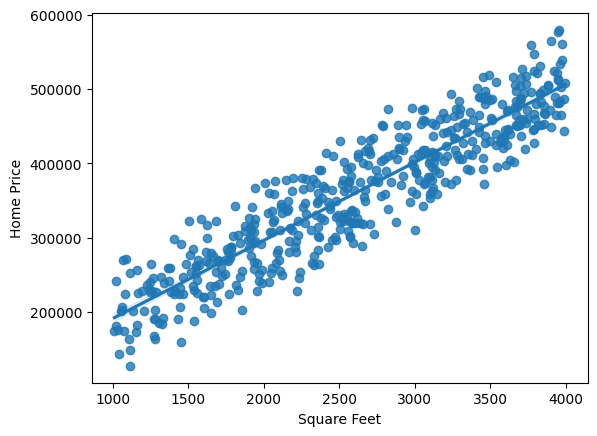

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=df['Square Feet'], y=df['Home Price'])
plt.xlabel('Square Feet')
plt.ylabel('Home Price')


**2. Independence of Errors Check (Residual Plot):**
   - **Expectation:** In the residual plot (residuals vs. predicted values), there should be no clear pattern or trend in the residuals. The points should be scattered randomly around the horizontal line at zero. A lack of pattern indicates independence of errors.

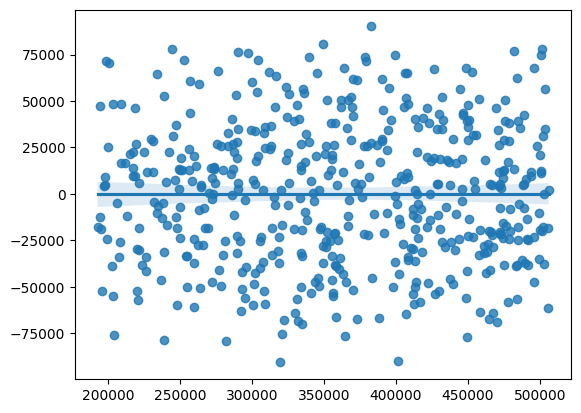

In [17]:
residuals = model.resid
sns.regplot(x=model.predict(), y=residuals)
plt.xlabel=('Predicted Values')
plt.ylabel=('Residuals')

**3. Normal Distribution of Errors Check (Histogram and Q-Q Plot):**
   - **Expectation (Histogram):** The histogram of residuals should resemble a bell-shaped curve, indicating a roughly normal distribution. It should be symmetric and unimodal.
   - **Expectation (Q-Q Plot):** In the Q-Q plot, the points should follow a straight line, especially in the middle section. Deviations from the line at the extremes may suggest departures from normality.


Text(0.5, 1.0, 'Q-Q Plot of Residuals')

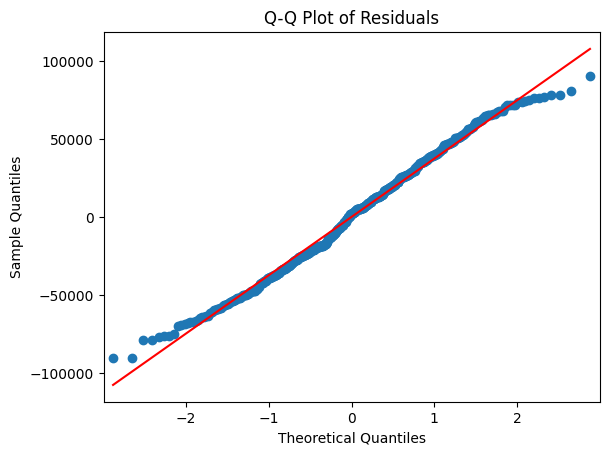

In [18]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')

# Checks the assumption of normality of the linear regression